# **ANÁLISIS EXPLORATORIO DE DATOS EDA**
 En esta Jupyter Notebook, se lleva a cabo el Análisis Exploratorio de Datos (EDA) sobre los conjuntos de datos previamente depurados. El objetivo principal de este proceso es seleccionar las variables más relevantes que serán utilizadas en la construcción del modelo de recomendación solicitado. Esto se debe a la consideración de la gran cantidad de información presente en los datos y la necesidad de optimizar los recursos de procesamiento y almacenamiento, especialmente al implementar el proyecto en un entorno de producción.

### IMPORTACIÓN DE LIBRERÍAS 

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Exploración Del DataFrame Reviews

In [51]:
df_reviews_sent = pd.read_parquet(r"C:\Users\ACER\Documents\HENRY\LABS\PI01\JUPYTER NOTEBOOKS\data\df_sentiment.parquet")
df_reviews_sent

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,polaridad,sentimiento
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,2011-11-05,,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,0.174444,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,2011-07-15,,22200,No ratings yet,True,It's unique and worth a playthrough.,0.337500,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,2011-04-21,,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,0.050000,1
3,js41637,http://steamcommunity.com/id/js41637,,2014-06-24,,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,0.114583,2
4,js41637,http://steamcommunity.com/id/js41637,,2013-09-08,,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,-0.036111,1
...,...,...,...,...,...,...,...,...,...,...,...
49181,llDracuwulf,http://steamcommunity.com/id/llDracuwulf,1 person found this review funny,2015-10-14,,730,1 of 1 people (100%) found this review helpful,True,its FUNNNNNNNN,0.000000,1
49182,76561198223837952,http://steamcommunity.com/profiles/76561198223...,,2015-10-10,,253980,No ratings yet,True,Awesome fantasy game if you don't mind the gra...,0.300000,2
49183,76561198229845636,http://steamcommunity.com/profiles/76561198229...,,2015-10-31,,730,No ratings yet,True,Prettyy Mad Game,-0.512500,0
49184,76561198232478272,http://steamcommunity.com/profiles/76561198232...,,2015-12-14,,730,No ratings yet,True,AMAZING GAME 10/10,0.100000,2


Se revisan los tipos de datos y cantidad de nulos si hay.

In [52]:
df_reviews_sent.describe()

,posted,polaridad,sentimiento
count,49186,49186.000000,49186.000000
mean,2014-09-08 16:51:37.466758912,0.120273,1.320254
min,2010-10-16 00:00:00,-1.000000,0.000000
25%,2014-02-20 00:00:00,0.000000,1.000000
50%,2014-09-11 00:00:00,0.066667,1.000000
75%,2015-05-03 00:00:00,0.260000,2.000000
max,2015-12-31 00:00:00,1.000000,2.000000
std,NaN,0.296700,0.694616


In [53]:
df_reviews_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49186 entries, 0 to 49185
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      49186 non-null  object        
 1   user_url     49186 non-null  object        
 2   funny        49186 non-null  object        
 3   posted       49186 non-null  datetime64[ns]
 4   last_edited  49186 non-null  object        
 5   item_id      49186 non-null  object        
 6   helpful      49186 non-null  object        
 7   recommend    49186 non-null  bool          
 8   review       49186 non-null  object        
 9   polaridad    49186 non-null  float64       
 10  sentimiento  49186 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 3.8+ MB


In [54]:
num_filas = df_reviews_sent.shape[0]
num_columnas = df_reviews_sent.shape[1]
print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')


Número de filas: 49186
Número de columnas: 11


In [55]:
df_reviews_sent.isnull().sum()

user_id        0
user_url       0
funny          0
posted         0
last_edited    0
item_id        0
helpful        0
recommend      0
review         0
polaridad      0
sentimiento    0
dtype: int64

Columnas 'sentiment_analysis' y 'reviews_recommend'

In [56]:
columna = 'sentimiento'
total_registros = len(df_reviews_sent)
resumen = df_reviews_sent[columna].value_counts().reset_index()
resumen.columns = [columna, 'Cantidad']
resumen['Porcentaje'] = (resumen['Cantidad'] / total_registros) * 100

print(resumen)



   sentimiento  Cantidad  Porcentaje
0            2     22264   45.264913
1            1     20410   41.495548
2            0      6512   13.239540


In [57]:
def resumen_cant_porcentaje(dataframe, columna):
    total_registros = len(dataframe)
    resumen = dataframe[columna].value_counts().reset_index()
    resumen.columns = [columna, 'Cantidad']
    resumen['Porcentaje'] = (resumen['Cantidad'] / total_registros) * 100
    return resumen



In [58]:
resumen_reviews_recommend = resumen_cant_porcentaje(df_reviews_sent, 'recommend')
print(resumen_reviews_recommend)

   recommend  Cantidad  Porcentaje
0       True     44182   89.826373
1      False      5004   10.173627


La mayoría de los registros de reviews, aproximadamente el 62%, muestran sentimientos neutrales, mientras que alrededor del 30% reflejan sentimientos positivos hacia el juego y menos del 9% expresan sentimientos negativos. Además, en aproximadamente el 88% de los reviews, los juegos son recomendados por los usuarios.

El siguiente código tiene como objetivo analizar la cantidad de recomendaciones en función de los diferentes sentimientos expresados en las reseñas.

In [59]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend' y se cuenta la cantidad de reviews en cada grupo
resumen = df_reviews_sent.groupby(['sentimiento', 'recommend']).size().reset_index(name='Cantidad')

# Se calcula el porcentaje por cada grupo
total_reviews = len(df_reviews_sent)
resumen['Porcentaje'] = (resumen['Cantidad'] / total_reviews) * 100

# Se crea un DataFrame con el resumen
sentimiento_recomendacion = resumen
sentimiento_recomendacion


,sentimiento,recommend,Cantidad,Porcentaje
0,0,False,1839,3.738869
1,0,True,4673,9.500671
2,1,False,2360,4.798113
3,1,True,18050,36.697434
4,2,False,805,1.636645
5,2,True,21459,43.628268


Observamos que, en comparación con el total de reseñas, aproximadamente el 54% de las reseñas con sentimientos neutrales recomiendan el juego. Esto podría sugerir que las reseñas neutrales pueden estar relacionadas con comentarios simples que no ofrecen muchos detalles, pero aún así indican una recomendación positiva hacia el juego. Por otro lado, alrededor del 6% de las reseñas con sentimientos negativos aún recomiendan el juego, lo que podría considerarse contradictorio.

In [60]:
cantidad_usuarios_opinaron = len(df_reviews_sent['user_id'].unique())
print(f"La cantidad de usuarios únicos que han expresado su opinión es: {cantidad_usuarios_opinaron}")


La cantidad de usuarios únicos que han expresado su opinión es: 22825


Un total de 22825 usurarios dieron su opinión sobre el juego que consumen, con lo que un usuario hizo mas de un comentario.

### Columna 'reviews_date'

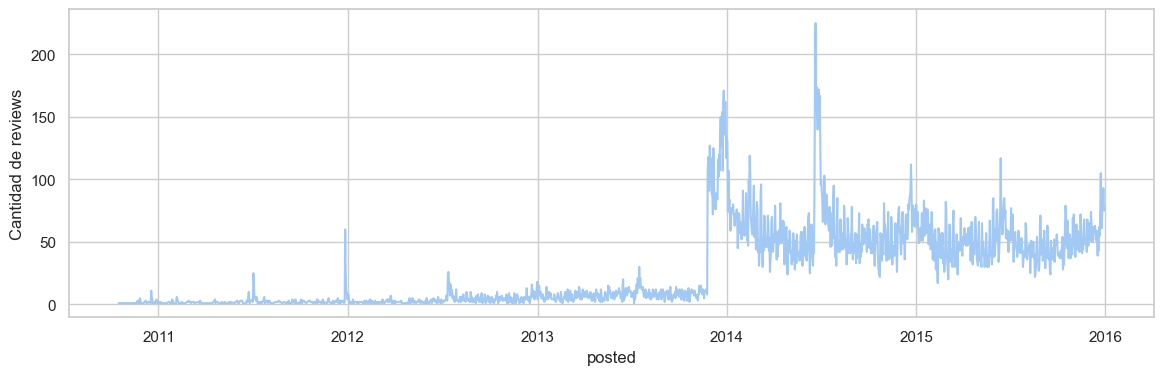

In [61]:
# Filtra las fechas válidas
df_dates = df_reviews_sent[df_reviews_sent["posted"].notnull()]

# Calcula la cantidad de reviews por fecha
df_review_counts = df_dates.groupby("posted").size().reset_index(name="Cantidad de reviews")

# Grafica
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_review_counts, x="posted", y="Cantidad de reviews")
plt.ylabel('Cantidad de reviews')
plt.show()


In [62]:
# Ordena el DataFrame por la columna 'reviews_recommend' en orden descendente y toma los primeros 5 registros
top_reviewed_days = df_review_counts.sort_values(by='Cantidad de reviews', ascending=False).head(5)

# Imprime los días con la mayor cantidad de reviews
print('Días de mayor cantidad de reviews:')
print(top_reviewed_days)


Días de mayor cantidad de reviews:
         posted  Cantidad de reviews
1087 2014-06-21                  225
1086 2014-06-20                  193
1089 2014-06-23                  174
1093 2014-06-27                  172
910  2013-12-26                  171


Hasta alrededor de 2014, se observa que la cantidad diaria de reseñas se mantuvo en niveles bajos, con algunos picos ocasionales. Sin embargo, a partir de ese año, se produjo un aumento significativo en la cantidad de reseñas por día, alcanzando un pico máximo el 21 de junio de 2014, con un total de 225 reseñas en un solo día.

## Exploración Del DataFrame SteamGames

In [63]:
df_games_EDA = pd.read_parquet(r"C:\Users\ACER\Documents\HENRY\LABS\PI01\JUPYTER NOTEBOOKS\data\user_games_clean.parquet")
df_games_EDA.head()


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,Año_estreno
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018
0,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018
0,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018
0,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018
0,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018


Se revisan los tipos de datos y cantidad de nulos si hay.

In [64]:
df_games_EDA.describe()

,discount_price,price,metascore
count,580.000000,68352.000000,5365.000000
mean,9.438897,8.839481,71.849953
std,15.183719,16.024124,10.624868
min,0.490000,0.000000,20.000000
25%,0.837500,2.990000,66.000000
50%,3.290000,4.990000,73.000000
75%,11.690000,9.990000,80.000000
max,139.990000,995.000000,96.000000


In [65]:
df_games_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71551 entries, 0 to 32133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       59112 non-null  object 
 1   genres          71551 non-null  object 
 2   app_name        71549 non-null  object 
 3   title           71549 non-null  object 
 4   url             71551 non-null  object 
 5   release_date    71551 non-null  object 
 6   tags            71505 non-null  object 
 7   reviews_url     71551 non-null  object 
 8   discount_price  580 non-null    float64
 9   specs           70994 non-null  object 
 10  price           68352 non-null  float64
 11  early_access    71551 non-null  bool   
 12  id              71551 non-null  object 
 13  metascore       5365 non-null   float64
 14  developer       71201 non-null  object 
 15  Año_estreno     71551 non-null  object 
dtypes: bool(1), float64(3), object(12)
memory usage: 8.8+ MB


In [66]:
num_filas = df_games_EDA.shape[0]
num_columnas = df_games_EDA.shape[1]
print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

Número de filas: 71551
Número de columnas: 16


In [67]:
df_games_EDA.isnull().sum()

publisher         12439
genres                0
app_name              2
title                 2
url                   0
release_date          0
tags                 46
reviews_url           0
discount_price    70971
specs               557
price              3199
early_access          0
id                    0
metascore         66186
developer           350
Año_estreno           0
dtype: int64

Podemos ver la cantidad de juegos que existen actualmente en la plataforma, o al menos en el dataset que estamos analizando.

In [68]:
df_games_EDA['id'].nunique()


28850

### TRATAMIENTO DE DATOS FALTANTES

Podemos notar que las columnas 'discount_price' y 'metascore' están prácticamente vacías, con casi el 100% de los datos faltantes. Dado que no parece tener sentido imputar valores en estas columnas, ya que no agregarían valor al modelo y podrían incluso introducir sesgos, hemos decidido eliminar estas columnas del conjunto de datos.

In [69]:
df_games_EDA.drop(['discount_price', 'metascore'], axis=1, inplace=True)


In [70]:
#Eliminación de datos no validos 
df_games_EDA = df_games_EDA[df_games_EDA['release_date'].str.match(r"^\d{4}-\d{2}-\d{2}$")]

In [71]:
df_games_EDA.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer', 'Año_estreno'],
      dtype='object')

### VISUALIZACIÓN DE DATOS 

**Análisis de la Distribución de Publicadores (Publishers)**

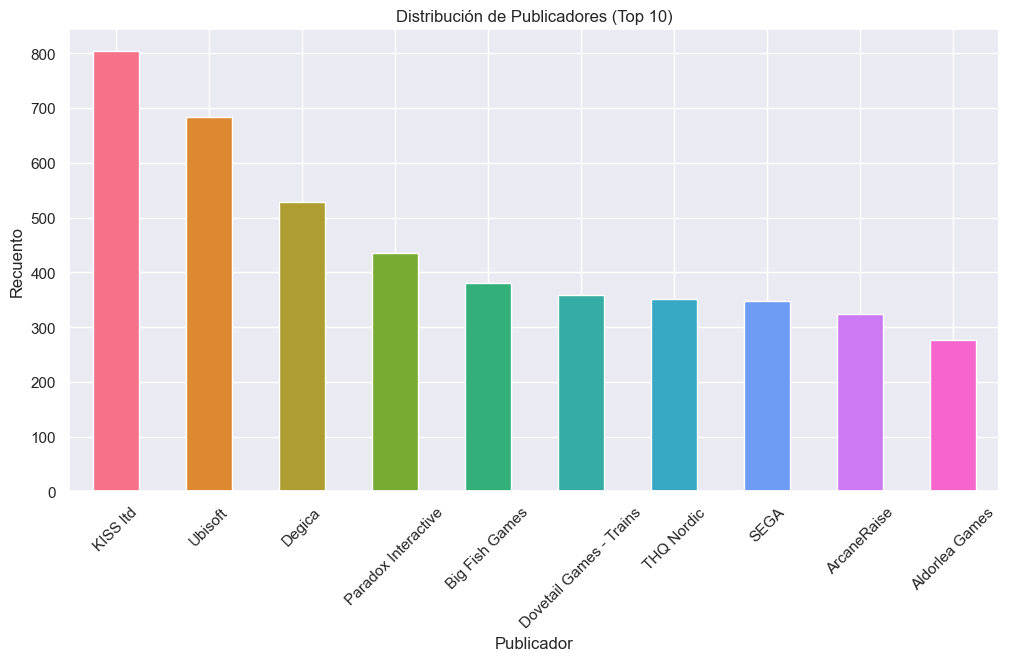

In [72]:
# Establecer el estilo estético
sns.set(style="darkgrid")

# Crear una figura con tamaño personalizado
plt.figure(figsize=(12, 6))

# Obtener los 10 principales publicadores y contar sus apariciones
top_publishers = df_games_EDA['publisher'].value_counts().head(10)

# Elegir una paleta de colores
colors = sns.color_palette("husl", len(top_publishers))

# Crear un gráfico de barras para la distribución de publicadores
top_publishers.plot(kind='bar', color=colors)

# Configurar título y etiquetas de los ejes
plt.title('Distribución de Publicadores (Top 10)')
plt.xlabel('Publicador')
plt.ylabel('Recuento')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



**Análisis de la Distribución de Géneros (Genres)**

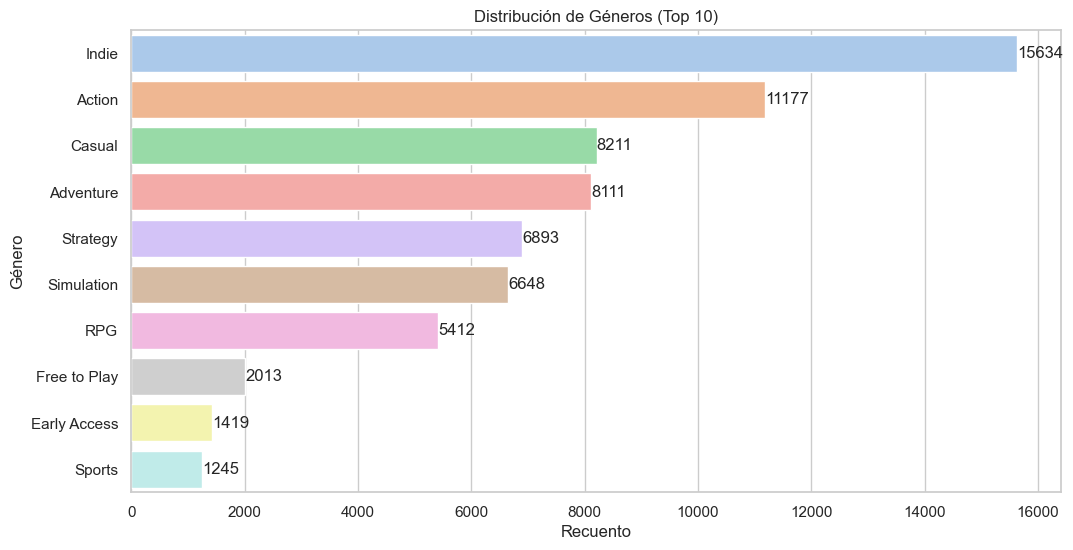

In [73]:
# Obtener la distribución de géneros y contar sus apariciones
genre_distribution = df_games_EDA['genres'].value_counts().head(10)

# Estilo estético para las gráficas
sns.set(style='whitegrid', palette='pastel')

# Crear el gráfico de barras horizontal con estilo estético
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_distribution.values, y=genre_distribution.index, orient='h')
plt.title('Distribución de Géneros (Top 10)')
plt.xlabel('Recuento')
plt.ylabel('Género')

# Agregar valores numéricos en las barras
for i, v in enumerate(genre_distribution.values):
    ax.text(v + 3, i, str(v), va='center', fontsize=12)

plt.show()



**Análisis de la Distribución de Fechas de Lanzamiento (Release Date)**

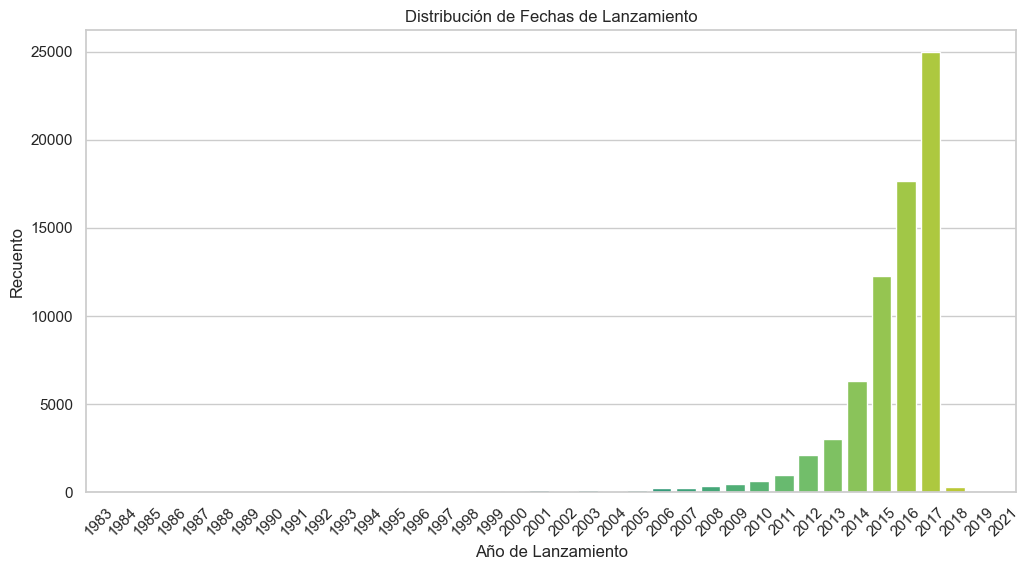

In [74]:
# Obtener la distribución de fechas de lanzamiento y contar sus apariciones
df_games_EDA['release_date'] = pd.to_datetime(df_games_EDA['release_date'])
release_years = df_games_EDA['release_date'].dt.year
year_distribution = release_years.value_counts().sort_index()

# Resto del código para la gráfica


# Estilo estético para las gráficas
sns.set(style='whitegrid', palette='pastel')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=year_distribution.index, y=year_distribution.values, palette='viridis')
plt.title('Distribución de Fechas de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Recuento')

# Rotar etiquetas del eje x para mejorar legibilidad
plt.xticks(rotation=45)

plt.show()


Se puede notar un aumento significativo en la plataforma a partir del año 2014, con un crecimiento exponencial en la cantidad de nuevos juegos publicados.

**Proporción de Juegos con Acceso Temprano (Early Access)**

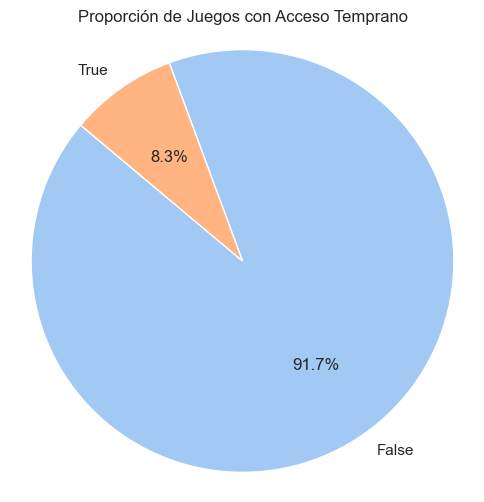

In [75]:
# Crear un gráfico de torta para la proporción de juegos con acceso temprano
plt.figure(figsize=(6, 6))
early_access_counts = df_games_EDA['early_access'].value_counts()
plt.pie(early_access_counts, labels=early_access_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Juegos con Acceso Temprano')
plt.axis('equal')  # Esto garantiza que el gráfico sea circular
plt.show()


**Análisis de la Distribución de Desarrolladores (Developer)**


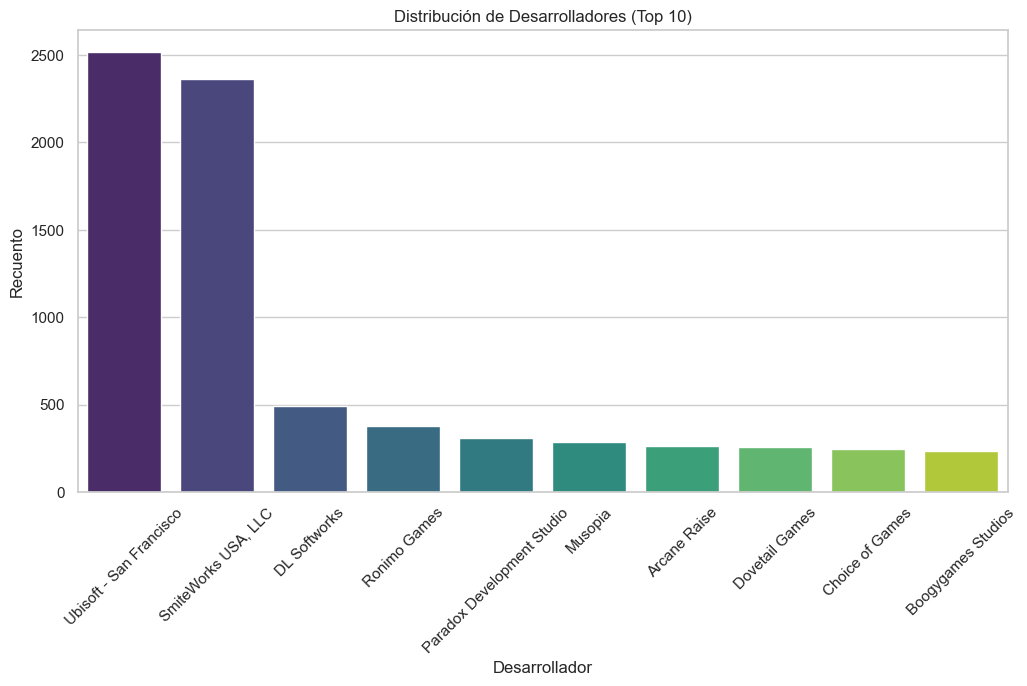

In [76]:
# Filtrar y contar los 10 principales desarrolladores
top_developers = df_games_EDA['developer'].value_counts().head(10)

# Crear un gráfico de barras para la distribución de los 10 principales desarrolladores
plt.figure(figsize=(12, 6))
sns.barplot(x=top_developers.index, y=top_developers.values, palette='viridis')
plt.title('Distribución de Desarrolladores (Top 10)')
plt.xlabel('Desarrollador')
plt.ylabel('Recuento')
plt.xticks(rotation=45)
plt.show()
